Punto 3) Estudie la distribución de tipos morfológicos y determine si la misma es consistente con una distribución
uniforme.

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
gal=pd.read_csv('galaxias.csv')
gal.head()
gal.describe()

,objID,z,petromag_g,petromag_u,petromag_r,elliptical,spiral
count,9.219100e+04,92191.000000,92191.000000,92191.000000,92191.000000,92191.000000,92191.000000
mean,1.237662e+18,0.053296,16.735594,18.236175,16.284832,0.173466,0.826534
std,5.770257e+12,0.018121,46.661421,46.671759,1.010880,0.378652,0.378652
min,1.237646e+18,-0.004136,-9999.000000,-9999.000000,11.596510,0.000000,0.000000
25%,1.237658e+18,0.038364,16.330710,17.794660,15.633810,0.000000,1.000000
50%,1.237662e+18,0.055473,17.064680,18.483310,16.409320,0.000000,1.000000
75%,1.237666e+18,0.069375,17.709465,19.126415,17.082950,0.000000,1.000000
max,1.237680e+18,0.080000,30.031850,40.258520,22.071080,1.000000,1.000000


In [3]:
gal = gal.drop(gal[gal['petromag_g']==-9999.00000].index)
gal.describe()

,objID,z,petromag_g,petromag_u,petromag_r,elliptical,spiral
count,9.218900e+04,92189.000000,92189.000000,92189.000000,92189.000000,92189.000000,92189.000000
mean,1.237662e+18,0.053295,16.952881,18.453494,16.284809,0.173470,0.826530
std,5.770004e+12,0.018121,0.987690,1.134976,1.010880,0.378655,0.378655
min,1.237646e+18,-0.004136,12.537240,12.840760,11.596510,0.000000,0.000000
25%,1.237658e+18,0.038364,16.330740,17.794690,15.633790,0.000000,1.000000
50%,1.237662e+18,0.055472,17.064690,18.483330,16.409230,0.000000,1.000000
75%,1.237666e+18,0.069375,17.709470,19.126430,17.082940,0.000000,1.000000
max,1.237680e+18,0.080000,30.031850,40.258520,22.071080,1.000000,1.000000


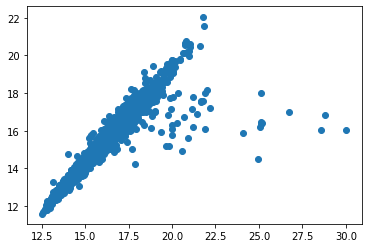

In [4]:
plt.scatter(gal.petromag_g,gal.petromag_r);

In [5]:
def lineal(x,y):
    x=np.array(x)
    y=np.array(y)
    if (len(x)!=len(y)):
        print('Error, x e y no tienen la misma longitud')
    else:
        n=len(x)
        a=(n*sum(x*y,0)-sum(x,0)*sum(y,0)/(n*sum(x*x,0)-sum(x,0))**2)
        b=sum(y,0)-a*sum(x,0)/n
        xm=sum(x)/n
        ym=sum(y)/n
        num=sum((x-xm)*(y-ym),0)
        dem=(((sum((x-xm)**2,0))**0.5)*((sum((y-ym)**2,0))**0.5))
        r=num/dem
    return(a,b,r)

In [6]:
a,b,r=lineal(gal.petromag_g,gal.petromag_r)
print(a,b,r)

2354580455699.2427 -39916920386538.98 0.9753086862135517


In [7]:
z=np.array(gal.petromag_g)
q=np.array(gal.petromag_r)
e=np.polyfit(z,q,1)
print(e)

[ 0.99820786 -0.6376901 ]


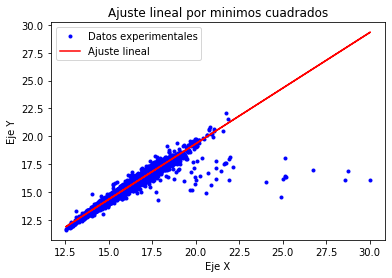

In [8]:
y_ajuste = e[0]*z + e[1]

# Dibujamos los datos experimentales
p_datos, = plt.plot(z, q, 'b.')
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(z, y_ajuste, 'r-')

plt.title('Ajuste lineal por minimos cuadrados')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.legend(('Datos experimentales', 'Ajuste lineal'), loc="upper left")
plt.show()

In [19]:
np.polyfit?